## Impimenting K Nearest Neighbours Algorithm

### Prepare Data 

In [55]:
import numpy as np                                        # import numpys
import matplotlib.pyplot as plt                           # import matplotlib visual package

from sklearn.datasets import make_classification          # Import an sklearn data set called make_classification
from sklearn.model_selection import train_test_split      # Use this to split the data randomly to two sets of data
from sklearn.preprocessing import StandardScaler          # to be used to standardize our numerical values

from sklearn.neighbors import KNeighborsClassifier        # import KNN classifier

from sklearn import metrics                               # find accuarcy of your models

In [59]:
X, y = make_classification(n_samples = 200, n_features = 8, n_informative = 8, n_redundant = 0, n_classes =2,random_state = 14)     # Assign the loaded data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)                                       # Split the data set

sc = StandardScaler()               # Create an instance for the scaler
sc.fit(X_train)                     # fit the standardized values
X_train = sc.transform(X_train)     # transform to the new values

sc.fit(X_test)                      # fit the test data too
X_test = sc.transform(X_test)       # X-test to be assigned the scaled values
X_train.shape                       # inspect the shape of our data to ensure consistency



(160, 8)

In [65]:
np.argwhere(np.isnan(X))

array([], shape=(0, 2), dtype=int64)

#### Find value of K

Use error curves to get the best K value to use

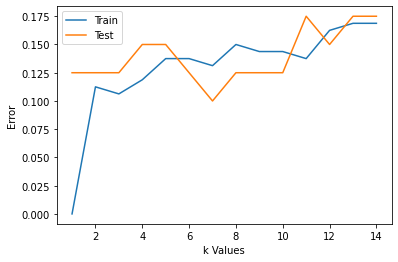

In [57]:
error1 = []
error2 = []                         # Create two error lists to store error values

for k in range(1, 15):
  knn = KNeighborsClassifier(n_neighbors = k)   # Create an instance for each value of K
  knn.fit(X_train, y_train)                     

  y_pred1 = knn.predict(X_train)
  error1.append(np.mean(y_train != y_pred1))    # find mean of all results to find error rate

  y_pred2 =knn.predict(X_test)
  error2.append(np.mean(y_test != y_pred2))     # find error rate for test data too

# Plot this graph of train and test error rates

plt.plot(range(1, 15), error1, label = "Train") # plot train data error rates

plt.plot(range(1,15), error2, label = "Test")   # plot test data error rates

plt.xlabel("k Values")                          # put labels to both axes
plt.ylabel('Error')

plt.legend()                                    #key
  


**Lets use K as 7 where the error rate for test data is least**

In [58]:
knn = KNeighborsClassifier(n_neighbors = 7)     # define K as inspected above
knn.fit(X_train, y_train)                       # fit the model

y_pred = knn.predict(X_test)                    # predict your variables using this model

metrics.accuracy_score(y_test, y_pred)          # test your models accuracy


0.9